# Kunskapskontroll 1 

### Fyll i uppgifterna nedan (obligatoriskt för att bli godkänd) innan du lämnar in på Omniway: 
Namn: 

Datum då du presenterade ditt arbete på lektionen: 

Presenterade du inte det på lektionen, skriv vem du har diskuterat igenom koden med: 

**I breakout room med Camilla, Magesh, Xiaowen**

# Task

As a data analyst there is plenty of opportunity to improve processes or suggest improved ways of doing things. When doing so it is often very smart and efficient (time is a scarce resource) to create a POC (Proof of Concept) which basically is a small demo checking wether it is worthwile going further with something. It is also something concrete which facilitates discussions, do not underestimate the power of that. 

In this example, you are working in a company that sells houses and they have a "manual" process of setting prices by humans. You as a Data Scientist can make this process better by using Machine Learning. Your task is to create a POC that you will present to your team colleagues and use as a source of discussion of wether or not you should continue with more detailed modelling. 

Two quotes to facilitate your reflection on the value of creating a PoC: 

"*Premature optimization is the root of all evil*". 

"*Fail fast*".


**More specifially, do the following:**
1. A short EDA (Exploratory Data Analysis) of the housing data set.
2. Drop the column "ocean_proximity", then you only have numeric columns which will simplify your analysis. Remember, this is a POC!
3. Split your data into train and test set.
4. You have missing values in your data. Handle this with [ SimpleImputer(strategy="median") ], check the fantastic Scikit-learn documentation for details.
5. Create one "Linear Regression" model and one "Lasso" model. For the Lasso model, use GridSearchCV to optimize $\alpha$ values, choose yourself which $\alpha$ values to evaluate.
Use RMSE as a metric to decide which model to choose. 

7. Evaluate your chosen model on the test set using the root mean squared error (RMSE) as the metric. Conclusions? 

8. Do a short presentation (~ 2-5 min) on your POC that you present to your colleagues (no need to prepare anything particular, just talk from the code). Think of:
- What do you want to highlight/present?
- What is your conclusion?
- What could be the next step? Is the POC convincing enough or is it not worthwile continuing? Do we need to dig deeper into this before taking some decisions?

# Loading Data

In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [442]:
# Load the data
housing = pd.read_csv(r'housing.csv')

In [443]:
# Look at the shape of the data in housing
print(housing.shape)

(20640, 10)


In [444]:
# Remove the column with non-numeric data
housing = housing.drop('ocean_proximity', axis=1)

## Training-Test Set Split of the Data

In [448]:
# Divide the data into a training set and a test set
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## EDA (Exploratory Data Analysis)

In [449]:
# Look at the first ten rows of the data in housing
print(train_set.head(10))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
17848    -121.86     37.42                20.0       5032.0           808.0   
6252     -117.97     34.04                28.0       1686.0           417.0   
9389     -122.53     37.91                37.0       2524.0           398.0   
6113     -117.90     34.13                 5.0       1126.0           316.0   
6061     -117.79     34.02                 5.0      18690.0          2862.0   

       population  households  median_income  median_house_value  
14196      2300.0       623.0         3.2596            103000.

In [450]:
# Look ath the stastics of the data in housing
print(train_set.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.582290     35.643149           28.608285   2642.004784   
std        2.005654      2.136665           12.602499   2174.646744   
min     -124.350000     32.550000            1.000000      2.000000   
25%     -121.810000     33.930000           18.000000   1454.000000   
50%     -118.510000     34.260000           29.000000   2129.000000   
75%     -118.010000     37.720000           37.000000   3160.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16512.000000  16512.000000  16512.000000   16512.000000   
mean       538.496851   1426.453004    499.986919       3.880754   
std        419.007096   1137.056380    380.967964       1.904294   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.75000

In [451]:
# Have also a look at how complete the data is
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB
None


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

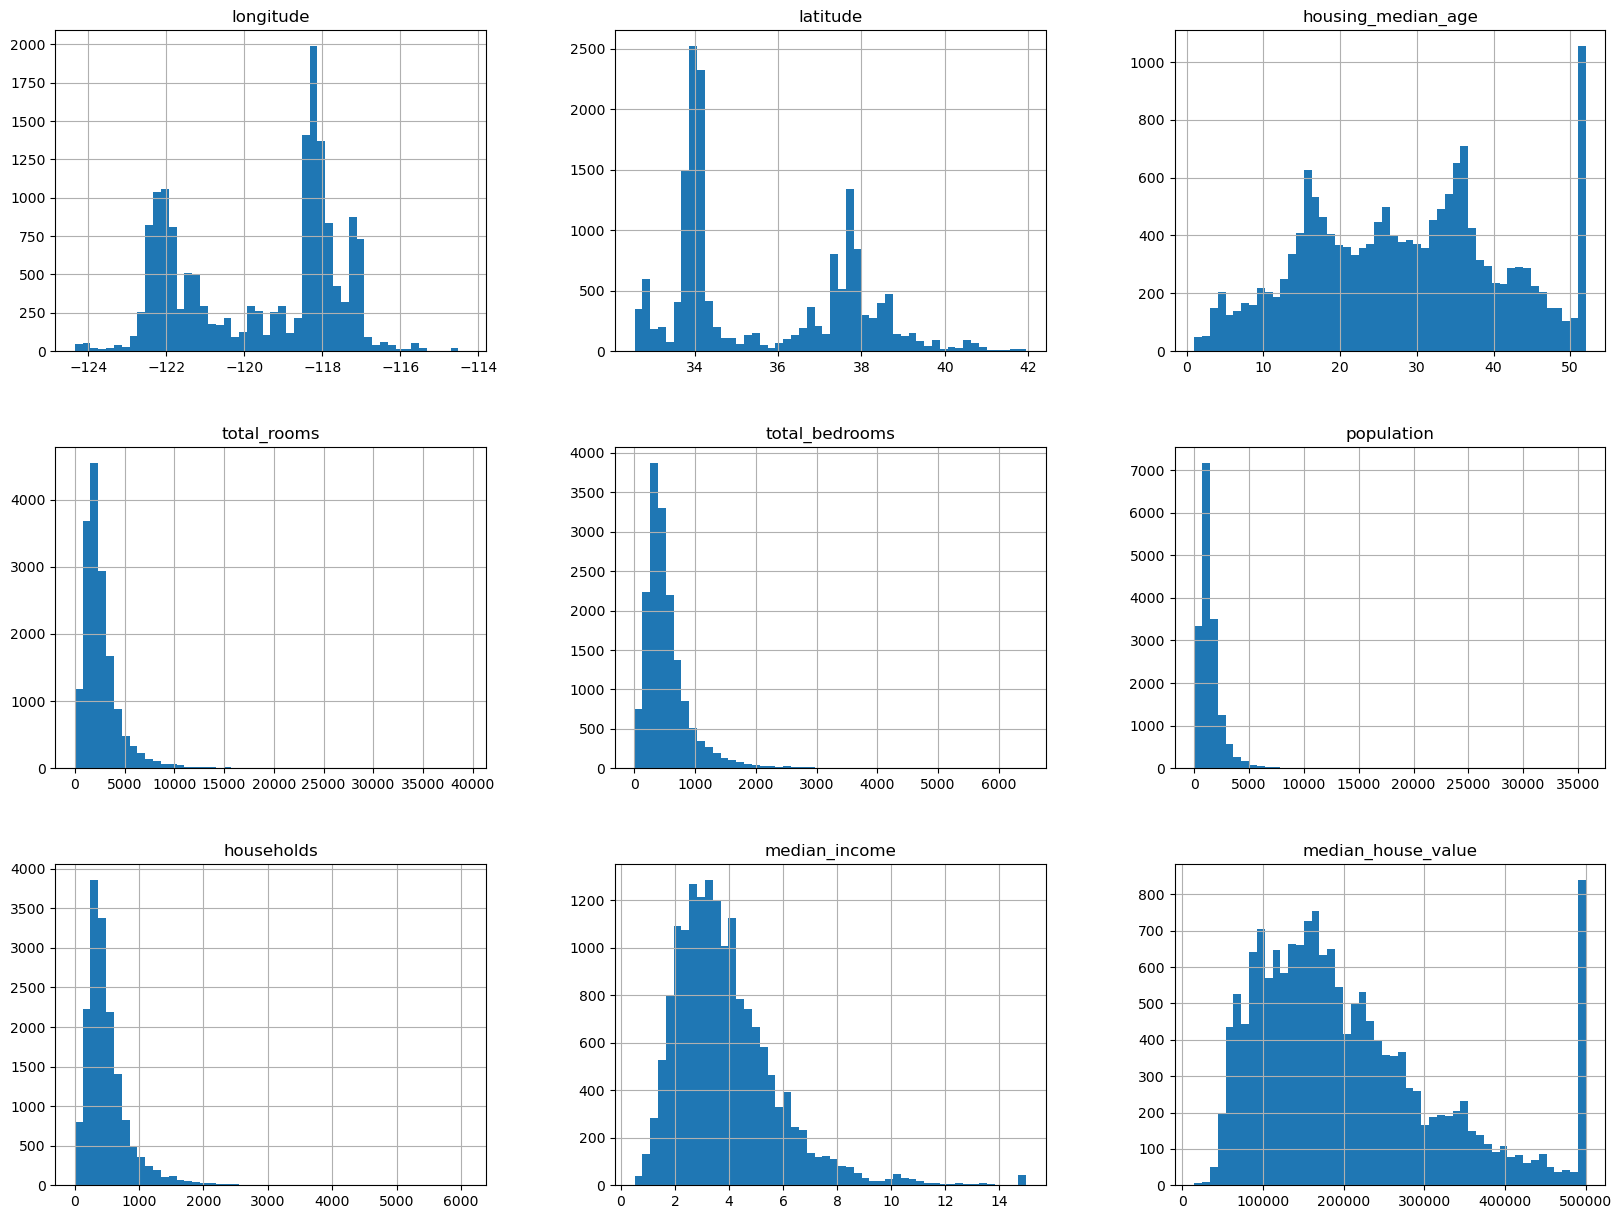

In [452]:
# Have a look at the histogram of the data
train_set.hist(bins=50, figsize=(20,15))

## Handling Missing Values

In [453]:
# Divide the training set into a set of features and a set of labels
train_features = train_set.drop("median_house_value", axis=1)
train_labels = train_set["median_house_value"].copy()

In [454]:
# Create an imputer pipeline for the data
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [455]:
# Transform the data using the pipeline
train_features_imputed = pipeline.fit_transform(train_features)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

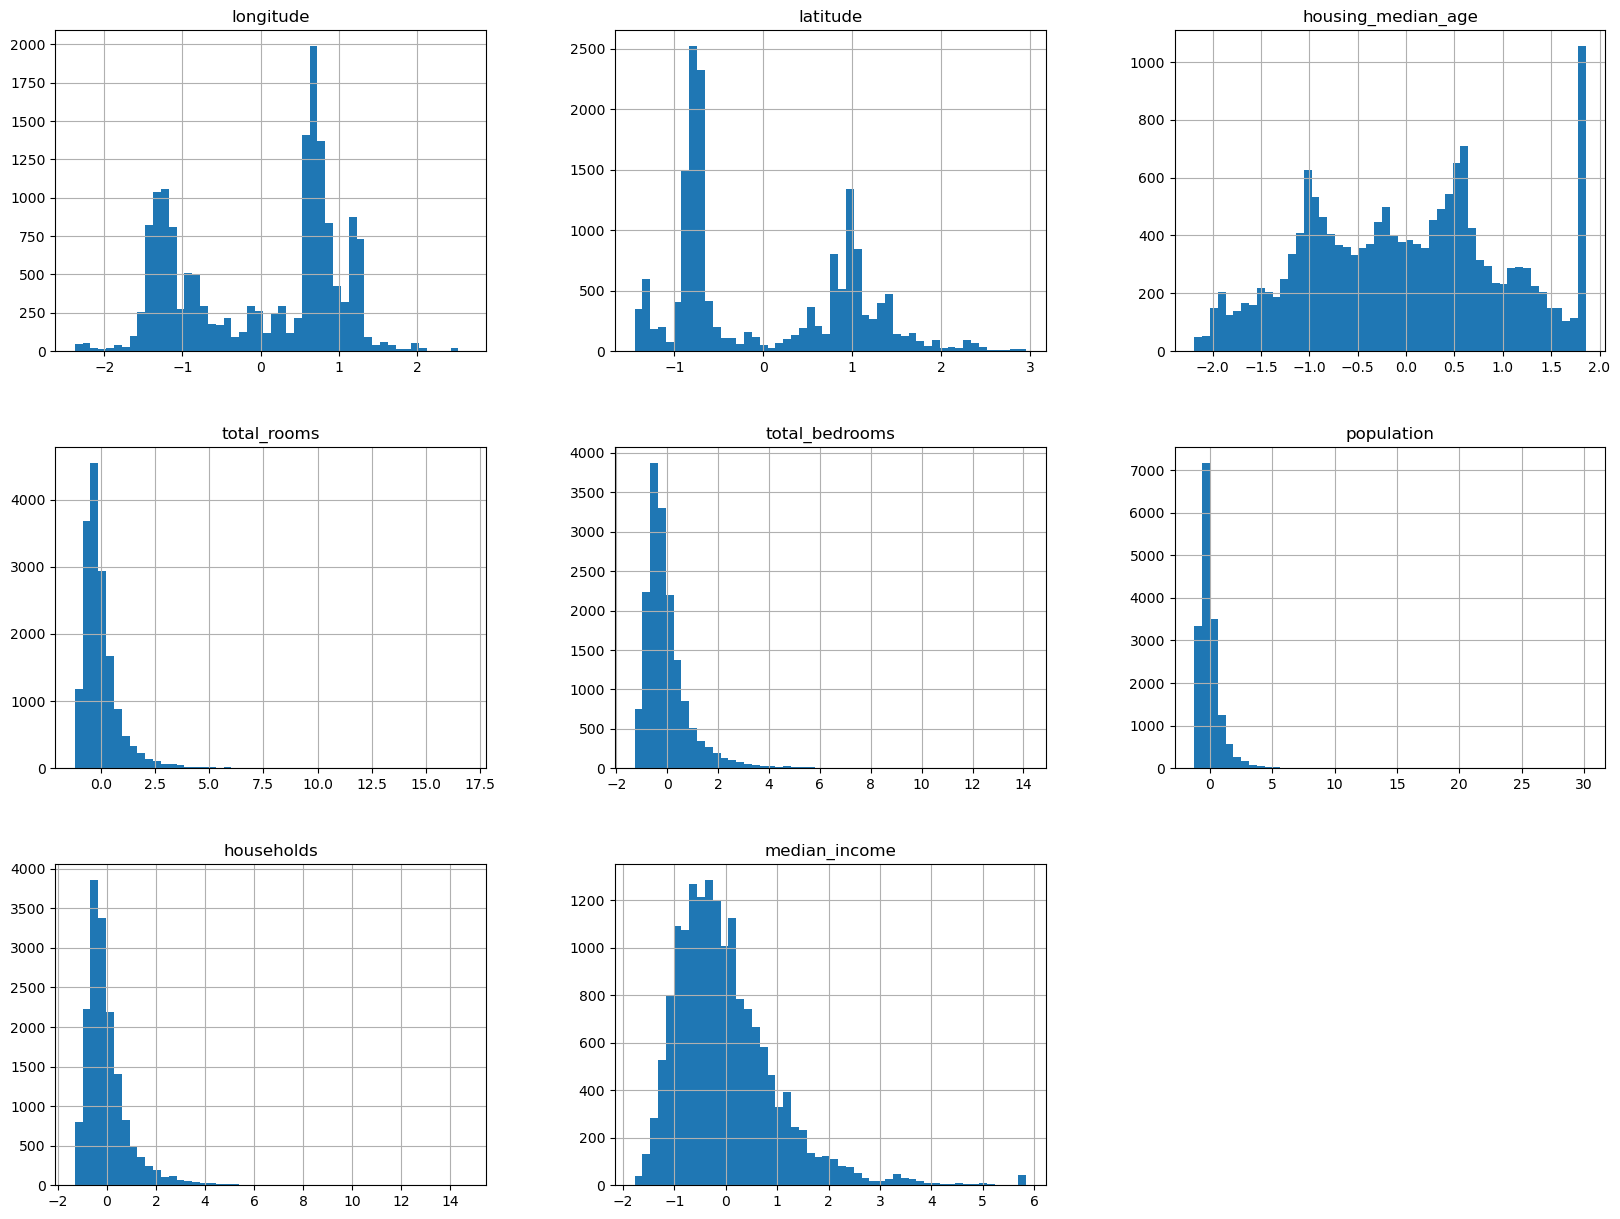

In [456]:
# Plot the histogram of the train_features_imputed, ie the data after imputation and scaling
train_features_imputed = pd.DataFrame(train_features_imputed, columns=train_features.columns)
train_features_imputed.hist(bins=50, figsize=(20,15))

## Linear Regression Model

In [457]:
# Use Linear Regression to predict the median house values
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train_features_imputed, train_labels)

LinearRegression()

In [458]:
# Look at the first five rows of the test_set
print(test_set.head(5))

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  
20046      1392.0       359.0         1.6812             47700.0  
3024       1565.0       584.0         2.5313             45800.0  
15663      1310.0       963.0         3.4801            500001.0  
20484      1705.0       495.0         5.7376            218600.0  
9814       1063.0       428.0         3.7250            278000.0  


In [459]:
# Transform the data using the pipeline
test_features = test_set.drop("median_house_value", axis=1)

In [460]:
# Predict the median house values
test_features_imputed = pipeline.transform(test_features)
test_labels = test_set["median_house_value"].copy()
predictions = linear_reg.predict(test_features_imputed)

/Users/matt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [461]:
# Compare the predictions with the actual values
print("Predictions:", predictions)
print("Labels:", list(test_labels))

Predictions: [ 63969.11159377 154577.11457447 253305.71454279 ... 439178.19697502
 130408.85287046 175272.25192552]
Labels: [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0, 123200.0, 253900.0, 215100.0, 220500.0, 219800.0, 136200.0, 178400.0, 187500.0, 139800.0, 137500.0, 425000.0, 405600.0, 138800.0, 500001.0, 162100.0, 51400.0, 151300.0, 94800.0, 204100.0, 361500.0, 85100.0, 138400.0, 137500.0, 465000.0, 271800.0, 239400.0, 340900.0, 150400.0, 128100.0, 156000.0, 258100.0, 90500.0, 71300.0, 219700.0, 151000.0, 290100.0, 142000.0, 291500.0, 255400.0, 98100.0, 251900.0, 162100.0, 129400.0, 89400.0, 150500.0, 133800.0, 80400.0, 211100.0, 255600.0, 214500.0, 500001.0, 202100.0, 81500.0, 98800.0, 281900.0, 184600.0, 254700.0, 143100.0, 162500.0, 142600.0, 85900.0, 186900.0, 71300.0, 174400.0, 225000.0, 146500.0, 405000.0, 189600.0, 164400.0, 337500.0, 72500.0, 143800.0, 160000.0, 118100.0, 374000.0, 202700.0, 96600.0, 65800.0, 167400.0, 17

In [462]:
# Calculate the mean squared error and root mean squared error
linear_mse = mean_squared_error(test_labels, predictions)
linear_rmse = np.sqrt(linear_mse)
print("Mean Squared Error:", linear_mse)
print("Root Mean Squared Error:", linear_rmse)

Mean Squared Error: 5059656033.126063
Root Mean Squared Error: 71131.25918417347


## Lasso Regression Model

In [478]:
# Use GridSearchCV to find the best alpha for lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid = [
    {'alpha': [0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000]}
]

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_features_imputed, train_labels)

# Look at the best parameters
print(grid_search.best_params_)
print(grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


{'alpha': 40}
Lasso(alpha=40)
69548.78903026546 {'alpha': 0.1}
69548.75256283855 {'alpha': 1}
69548.43497766086 {'alpha': 10}
69548.18835509513 {'alpha': 20}
69548.04088417016 {'alpha': 30}
69548.00428457474 {'alpha': 40}
69548.07427966509 {'alpha': 50}
69548.25080132541 {'alpha': 60}
69548.52373840522 {'alpha': 70}
69548.90137865407 {'alpha': 80}
69549.38657399305 {'alpha': 90}
69549.98445286177 {'alpha': 100}
70000.24090394707 {'alpha': 1000}


So 40 is the optimal value for alpha.

In [479]:
# Use Lasso Regression to predict the median house value
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=40)
lasso_reg.fit(train_features_imputed, train_labels)

Lasso(alpha=40)

In [480]:
# Predict the median house value
predictions = lasso_reg.predict(test_features_imputed)

/Users/matt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [481]:
# Compare the predictions with the actual values
print("Predictions:", predictions)
print("Labels:", list(test_labels))

Predictions: [ 64199.11990135 154896.06282187 253514.18993979 ... 439050.18671645
 130740.06050152 175189.85637121]
Labels: [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0, 123200.0, 253900.0, 215100.0, 220500.0, 219800.0, 136200.0, 178400.0, 187500.0, 139800.0, 137500.0, 425000.0, 405600.0, 138800.0, 500001.0, 162100.0, 51400.0, 151300.0, 94800.0, 204100.0, 361500.0, 85100.0, 138400.0, 137500.0, 465000.0, 271800.0, 239400.0, 340900.0, 150400.0, 128100.0, 156000.0, 258100.0, 90500.0, 71300.0, 219700.0, 151000.0, 290100.0, 142000.0, 291500.0, 255400.0, 98100.0, 251900.0, 162100.0, 129400.0, 89400.0, 150500.0, 133800.0, 80400.0, 211100.0, 255600.0, 214500.0, 500001.0, 202100.0, 81500.0, 98800.0, 281900.0, 184600.0, 254700.0, 143100.0, 162500.0, 142600.0, 85900.0, 186900.0, 71300.0, 174400.0, 225000.0, 146500.0, 405000.0, 189600.0, 164400.0, 337500.0, 72500.0, 143800.0, 160000.0, 118100.0, 374000.0, 202700.0, 96600.0, 65800.0, 167400.0, 17

In [482]:
# Calculate the mean squared error
lasso_housing_predictions = lasso_reg.predict(train_features_imputed)
lasso_mse = mean_squared_error(train_labels, lasso_housing_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print("Mean squared error:", lasso_mse)
print("Root mean squared error:", lasso_rmse)

Mean squared error: 4811252801.594447
Root mean squared error: 69363.19486294188


In [483]:
# Compare the lasso regression with the linear regression
print("Linear regression:", linear_rmse)
print("Lasso regression:", lasso_rmse)

Linear regression: 71131.25918417347
Lasso regression: 69363.19486294188


## Ridge Regression Model

Det ser ut som om lasso-regression inte ger någon förbättring jämfört med linjär regression.
Vi försöker nu med att testa ridge regression för att se om det skulle kunna ge ett bättre resultat.

In [484]:
# Try Ridge Regression on the same data
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(train_features_imputed, train_labels)

Ridge(alpha=1, solver='cholesky')

In [485]:
# Predict the median house value using Ridge Regression
print("Predictions:", ridge_reg.predict(test_features_imputed))

Predictions: [ 63994.90886256 154609.44645006 253402.8577455  ... 439160.77362999
 130459.23785463 175262.20320443]


/Users/matt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [486]:
# Calculate the mean squared error
ridge_housing_predictions = ridge_reg.predict(train_features_imputed)
ridge_mse = mean_squared_error(train_labels, ridge_housing_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("Mean squared error:", ridge_mse)
print("Root mean squared error:", ridge_rmse)

Mean squared error: 4811135535.758371
Root mean squared error: 69362.34955477194


In [487]:
# Compare the ridge regression with lasso and linear regression
print("Linear regression:", linear_rmse)
print("Lasso regression:", lasso_rmse)
print("Ridge regression:", ridge_rmse)

Linear regression: 71131.25918417347
Lasso regression: 69363.19486294188
Ridge regression: 69362.34955477194


## Slutsats

Vi drar slutsatsen att Lasso Regression ger den bästa modellen för att förutsäga median house value och efter det är det Ridge Regression som ger den bästa modellen. Detta även om skillnade inte är märkbart stor.